In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set()
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [16]:
dfTrainingValues = pd.read_csv('TrainingValues.csv')
dfTrainingLabels = pd.read_csv('TrainingLabels.csv')
dfTest = pd.read_csv('TestValues.csv')

In [17]:
df = dfTrainingValues.merge(dfTrainingLabels, on='id')

In [18]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [19]:
print(df.iloc[1])

id                                          8776
amount_tsh                                   0.0
date_recorded                         2013-03-06
funder                                   Grumeti
gps_height                                  1399
installer                                GRUMETI
longitude                              34.698766
latitude                               -2.147466
wpt_name                                Zahanati
num_private                                    0
basin                              Lake Victoria
subvillage                               Nyamara
region                                      Mara
region_code                                   20
district_code                                  2
lga                                    Serengeti
ward                                       Natta
population                                   280
public_meeting                               NaN
recorded_by              GeoData Consultants Ltd
scheme_management   

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [21]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [22]:
df['amount_tsh'].replace(0.0, np.nan, inplace=True)
df['gps_height'].replace(0.0, np.nan, inplace=True)
df['population'].replace(0.0, np.nan, inplace=True)


In [23]:
dfTest['amount_tsh'].replace(0.0, np.nan, inplace=True)
dfTest['gps_height'].replace(0.0, np.nan, inplace=True)
dfTest['population'].replace(0.0, np.nan, inplace=True)

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

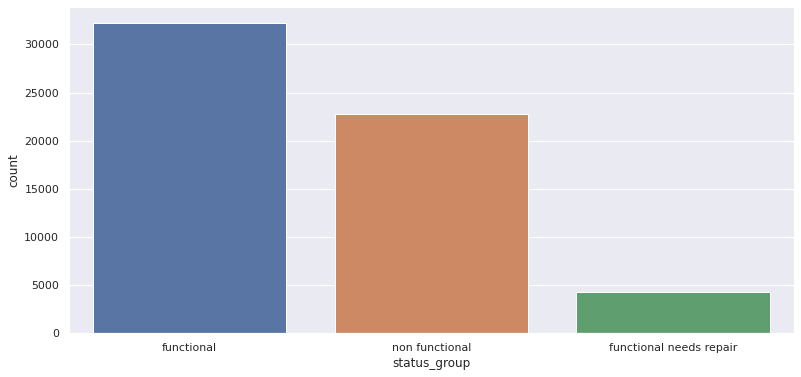

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(df.status_group)
df.status_group.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

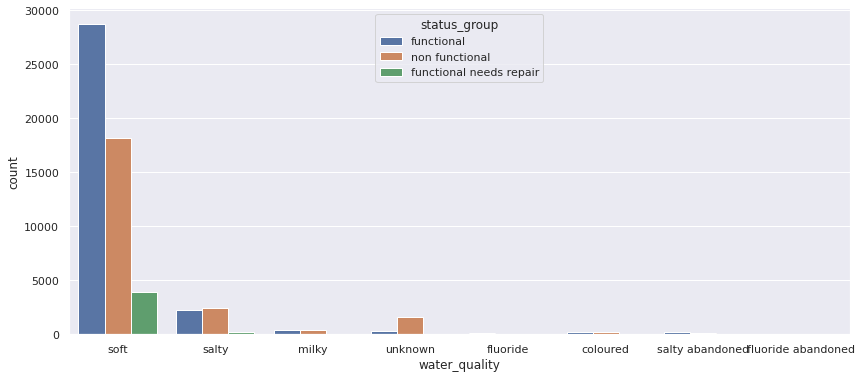

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='water_quality',hue='status_group')
df.water_quality.value_counts()

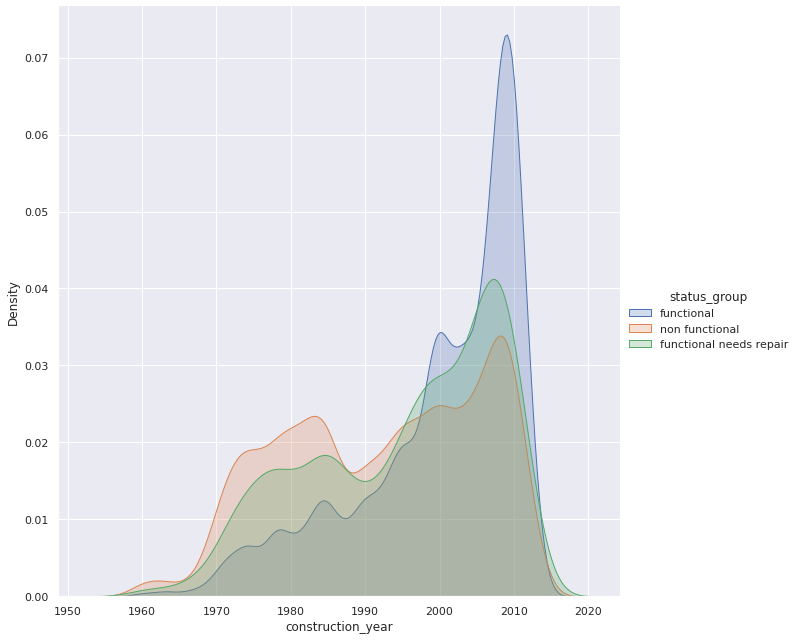

In [ ]:
sns.FacetGrid(df, hue='status_group',height=9).map(sns.kdeplot, 'construction_year', shade=True).add_legend()

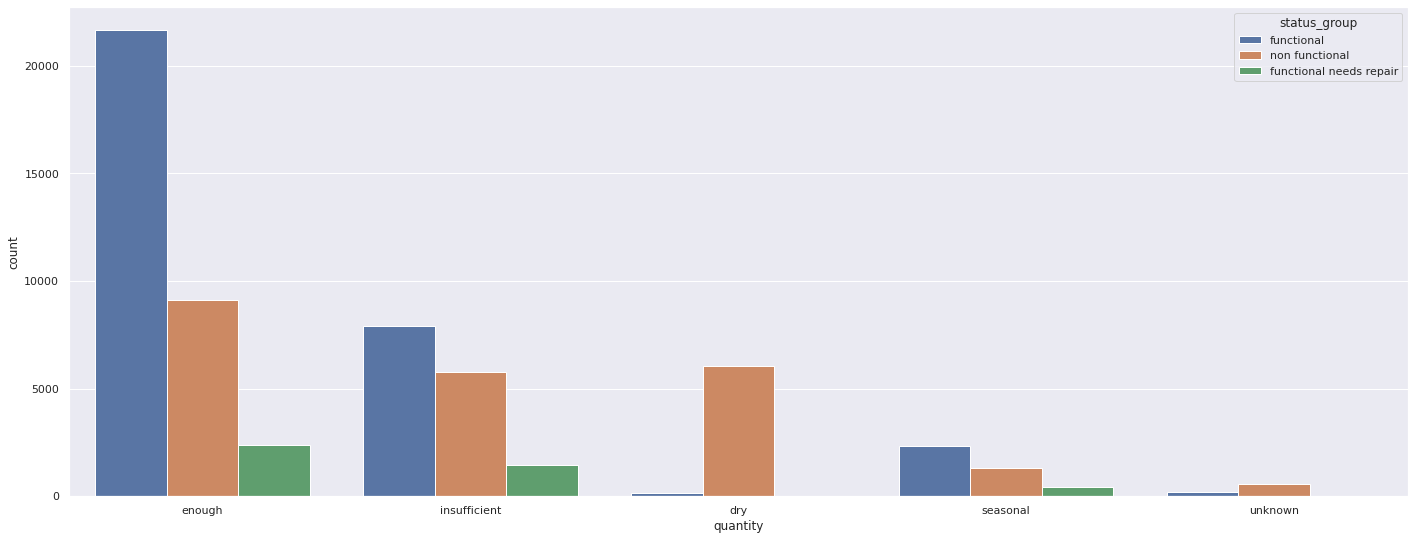

In [ ]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='quantity',hue='status_group')

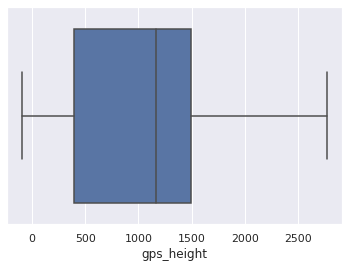

In [ ]:
sns.boxplot(df.gps_height)


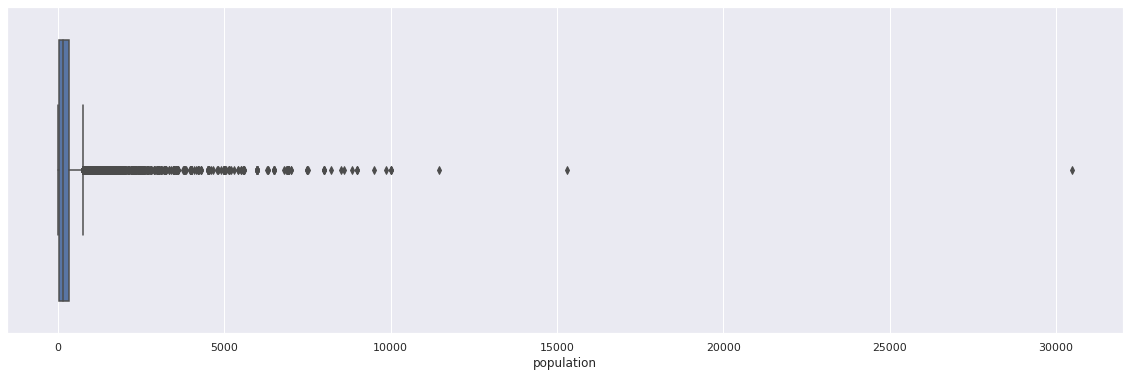

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(df.population)

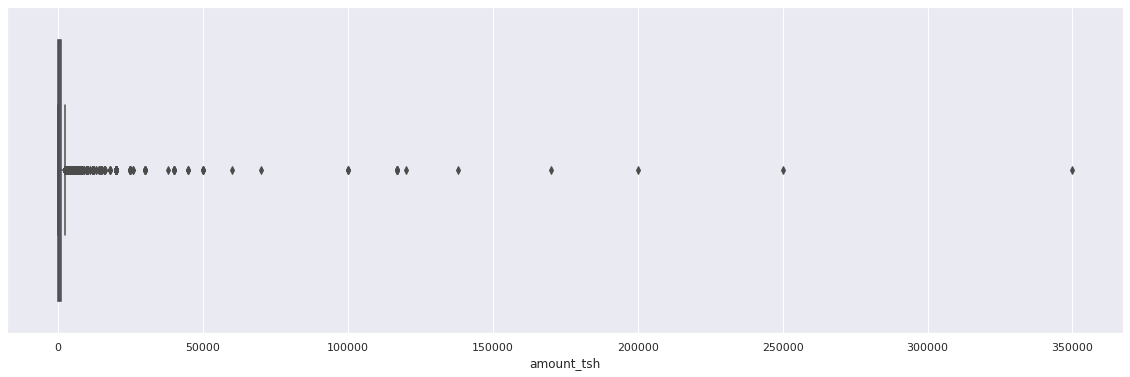

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(df.amount_tsh)

In [24]:
df["gps_height"].fillna(df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df["gps_height"].mean(), inplace=True)
df["population"].fillna(df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
df["population"].fillna(df.groupby(['region'])["population"].transform("median"), inplace=True)
df["population"].fillna(df["population"].median(), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df["amount_tsh"].median(), inplace=True)
df["funder"].fillna("other", inplace=True)
df["scheme_management"].fillna("other", inplace=True)


In [25]:
dfTest["gps_height"].fillna(dfTest.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
dfTest["gps_height"].fillna(dfTest.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
dfTest["gps_height"].fillna(dfTest["gps_height"].mean(), inplace=True)
dfTest["population"].fillna(dfTest.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
dfTest["population"].fillna(dfTest.groupby(['region'])["population"].transform("median"), inplace=True)
dfTest["population"].fillna(dfTest["population"].median(), inplace=True)
dfTest["amount_tsh"].fillna(dfTest.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
dfTest["amount_tsh"].fillna(dfTest.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
dfTest["amount_tsh"].fillna(dfTest["amount_tsh"].median(), inplace=True)
dfTest["funder"].fillna("other", inplace=True)
dfTest["scheme_management"].fillna("other", inplace=True)



In [26]:
print(df.latitude.max()-df.latitude.min())
print(df.longitude.max()-df.longitude.min())

11.64944016
40.34519307


In [27]:
dx=['amount_tsh', 'gps_height', 'population']
df[dx] = MinMaxScaler(feature_range=(0,20)).fit_transform(df[dx])
dfTest[dx] = MinMaxScaler(feature_range=(0,20)).fit_transform(dfTest[dx])
dx

['amount_tsh', 'gps_height', 'population']

In [28]:

df['longitude'].replace(0.0, np.nan, inplace=True)
df['latitude'].replace(0.0, np.nan, inplace=True)
df['construction_year'].replace(0.0, np.nan, inplace=True)

In [29]:

dfTest['longitude'].replace(0.0, np.nan, inplace=True)
dfTest['latitude'].replace(0.0, np.nan, inplace=True)
dfTest['construction_year'].replace(0.0, np.nan, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             17761 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             38962 non-null  float64
 5   installer              55745 non-null  object 
 6   longitude              57588 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
df.isnull().sum()

id                           0
amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
longitude                 1812
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [30]:
df["latitude"].fillna(df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
df["construction_year"].fillna(df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df["construction_year"].median(), inplace=True)


In [31]:
dfTest["latitude"].fillna(dfTest.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
dfTest["longitude"].fillna(dfTest.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
dfTest["longitude"].fillna(dfTest.groupby(['region'])["longitude"].transform("mean"), inplace=True)
dfTest["construction_year"].fillna(dfTest.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
dfTest["construction_year"].fillna(dfTest.groupby(['region'])["construction_year"].transform("median"), inplace=True)
dfTest["construction_year"].fillna(dfTest.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
dfTest["construction_year"].fillna(dfTest["construction_year"].median(), inplace=True)

In [32]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df['working_years'] = df.date_recorded.dt.year - df.construction_year
dfTest['date_recorded'] = pd.to_datetime(dfTest['date_recorded'])
dfTest['working_years'] = dfTest.date_recorded.dt.year - dfTest.construction_year
df.working_years.head()

0    12.0
1     3.0
2     4.0
3    27.0
4     8.0
Name: working_years, dtype: float64

In [ ]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group', 'working_years'],
      dtype='object')

In [33]:
deleted=['wpt_name','date_recorded','construction_year','installer','public_meeting','permit','ward','source_type','source_class','waterpoint_type_group','quantity_group','quality_group','payment','scheme_name','num_private','subvillage','region_code','recorded_by','management_group','extraction_type_group','extraction_type_class']

df.drop(deleted,axis=1,inplace=True)
dfTest.drop(deleted,axis=1,inplace=True)

In [34]:
df.waterpoint_type = df.waterpoint_type.str.lower()
df.funder = df.funder.str.lower()
df.basin = df.basin.str.lower()
df.region = df.region.str.lower()
df.source = df.source.str.lower()
df.lga = df.lga.str.lower()
df.management = df.management.str.lower()
df.quantity = df.quantity.str.lower()
df.water_quality = df.water_quality.str.lower()
df.payment_type=df.payment_type.str.lower()
df.extraction_type=df.extraction_type.str.lower()

In [35]:
dfTest.waterpoint_type = dfTest.waterpoint_type.str.lower()
dfTest.funder = dfTest.funder.str.lower()
dfTest.basin = dfTest.basin.str.lower()
dfTest.region = dfTest.region.str.lower()
dfTest.source = dfTest.source.str.lower()
dfTest.lga = dfTest.lga.str.lower()
dfTest.management = dfTest.management.str.lower()
dfTest.quantity = dfTest.quantity.str.lower()
dfTest.water_quality = dfTest.water_quality.str.lower()
dfTest.payment_type = dfTest.payment_type.str.lower()
dfTest.extraction_type = dfTest.extraction_type.str.lower()

In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  float64
 4   longitude          59400 non-null  float64
 5   latitude           59400 non-null  float64
 6   basin              59400 non-null  object 
 7   region             59400 non-null  object 
 8   district_code      59400 non-null  int64  
 9   lga                59400 non-null  object 
 10  population         59400 non-null  float64
 11  scheme_management  59400 non-null  object 
 12  extraction_type    59400 non-null  object 
 13  management         59400 non-null  object 
 14  payment_type       59400 non-null  object 
 15  water_quality      59400 non-null  object 
 16  quantity           594

In [ ]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'longitude', 'latitude',
       'basin', 'region', 'district_code', 'lga', 'population',
       'scheme_management', 'extraction_type', 'management', 'payment_type',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'status_group', 'working_years'],
      dtype='object')

In [36]:
pd.DataFrame(df).to_csv("ProcessedTraining.csv")
pd.DataFrame(dfTest).to_csv("ProcessedTest.csv")

In [37]:
train = pd.read_csv('ProcessedTraining.csv')
test = pd.read_csv('ProcessedTest.csv')

In [38]:
train.columns

Index(['Unnamed: 0', 'id', 'amount_tsh', 'funder', 'gps_height', 'longitude',
       'latitude', 'basin', 'region', 'district_code', 'lga', 'population',
       'scheme_management', 'extraction_type', 'management', 'payment_type',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'status_group', 'working_years'],
      dtype='object')

In [39]:
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)
df=train.pop('status_group')

In [40]:
train.shape,test.shape

((59400, 20), (14850, 20))

In [41]:
train['train'] = 1
test['train'] = 0
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  float64
 4   longitude          59400 non-null  float64
 5   latitude           59400 non-null  float64
 6   basin              59400 non-null  object 
 7   region             59400 non-null  object 
 8   district_code      59400 non-null  int64  
 9   lga                59400 non-null  object 
 10  population         59400 non-null  float64
 11  scheme_management  59400 non-null  object 
 12  extraction_type    59400 non-null  object 
 13  management         59400 non-null  object 
 14  payment_type       59400 non-null  object 
 15  water_quality      59400 non-null  object 
 16  quantity           594

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14850 non-null  int64  
 1   amount_tsh         14850 non-null  float64
 2   funder             14850 non-null  int64  
 3   gps_height         14850 non-null  float64
 4   longitude          14850 non-null  float64
 5   latitude           14850 non-null  float64
 6   basin              14850 non-null  int64  
 7   region             14850 non-null  int64  
 8   district_code      14850 non-null  int64  
 9   lga                14850 non-null  int64  
 10  population         14850 non-null  float64
 11  scheme_management  14850 non-null  int64  
 12  extraction_type    14850 non-null  int64  
 13  management         14850 non-null  int64  
 14  payment_type       14850 non-null  int64  
 15  water_quality      14850 non-null  int64  
 16  quantity           148

In [42]:
AllValues = pd.concat([train, test])
AllValues.shape

(74250, 21)

In [43]:
AllValues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 74250 non-null  int64  
 1   amount_tsh         74250 non-null  float64
 2   funder             74250 non-null  object 
 3   gps_height         74250 non-null  float64
 4   longitude          74250 non-null  float64
 5   latitude           74250 non-null  float64
 6   basin              74250 non-null  object 
 7   region             74250 non-null  object 
 8   district_code      74250 non-null  int64  
 9   lga                74250 non-null  object 
 10  population         74250 non-null  float64
 11  scheme_management  74250 non-null  object 
 12  extraction_type    74250 non-null  object 
 13  management         74250 non-null  object 
 14  payment_type       74250 non-null  object 
 15  water_quality      74250 non-null  object 
 16  quantity           742

In [44]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
AllValues['funder'] = le.fit_transform(AllValues['funder'])
AllValues['basin'] = le.fit_transform(AllValues['basin'])
AllValues['region'] = le.fit_transform(AllValues['region'])
AllValues['lga'] = le.fit_transform(AllValues['lga'])
AllValues['scheme_management'] = le.fit_transform(AllValues['scheme_management'])
AllValues['extraction_type'] = le.fit_transform(AllValues['extraction_type'])
AllValues['management'] = le.fit_transform(AllValues['management'])
AllValues['payment_type'] = le.fit_transform(AllValues['payment_type'])
AllValues['water_quality'] = le.fit_transform(AllValues['water_quality'])
AllValues['quantity'] = le.fit_transform(AllValues['quantity'])
AllValues['source'] = le.fit_transform(AllValues['source'])
AllValues['waterpoint_type'] = le.fit_transform(AllValues['waterpoint_type'])
AllValues['working_years'] = le.fit_transform(AllValues['working_years'])
AllValues['district_code'] = le.fit_transform(AllValues['district_code'])

In [45]:
dfTrain = AllValues[AllValues["train"] == 1]
dfTest = AllValues[AllValues["train"] == 0]
dfTrain.drop(["train"], axis=1, inplace=True)
dfTrain.drop(['id'],axis=1, inplace=True)
dfTest.drop(["train"], axis=1, inplace=True)

In [46]:
dfTest.drop(['id'],axis=1, inplace=True)

In [48]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(random_state=1)
params = {'n_estimators':[100,200,500,1000]}
clf = GridSearchCV(estimator,params,scoring='accuracy')
clf.fit(dfTrain,df)

KeyboardInterrupt: ignored

In [ ]:
clf.best_params_

{'n_estimators': 1000}

In [ ]:
clf.best_score_

0.8084175084175085

In [ ]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()
params = {'max_depth':[2,3,6,9,10,20]}
clf = GridSearchCV(estimator,params,scoring='accuracy')
clf.fit(dfTrain,df)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 6, 9, 10, 20]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'max_depth': 20}

In [ ]:

clf.best_score_

0.7667171717171717

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=1)
params = {'learning_rate':[0.05,0.1],'n_estimators':[100,200], 'max_depth':[2,3]}
clf = GridSearchCV(estimator,params,scoring='accuracy')
clf.fit(dfTrain,df)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [ ]:

clf.best_score_

0.7663131313131314

In [ ]:
from xgboost import XGBClassifier
estimator = XGBClassifier(random_state=1)
params = {'reg_lambda':[0.1,0.3,5,10],'n_estimators':[50,100,500],'reg_alpha':[0.1,0.3,0.5,1]}
clf = GridSearchCV(estimator,params,scoring='accuracy')
clf.fit(dfTrain,df)

GridSearchCV(estimator=XGBClassifier(random_state=1),
             param_grid={'n_estimators': [50, 100, 500],
                         'reg_alpha': [0.1, 0.3, 0.5, 1],
                         'reg_lambda': [0.1, 0.3, 5, 10]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 0.1}

In [ ]:
clf.best_score_

0.7778114478114477

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kScores = []
kRange = range(1,20)

for k in kRange:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, dfTrain, df, cv=5, scoring='accuracy')
  kScores.append(scores.mean())



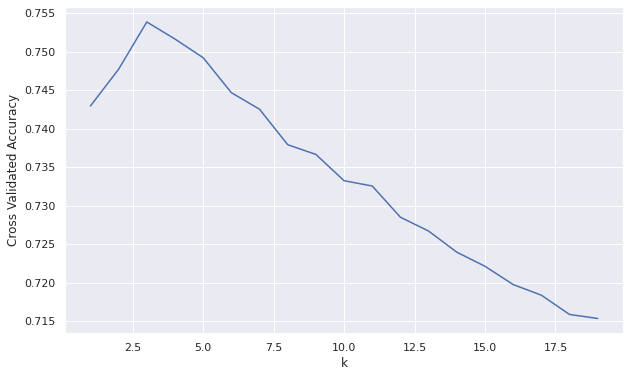

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(kRange, kScores)
plt.xlabel('k')
plt.ylabel('Cross Validated Accuracy')
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=1)
params = {'n_estimators':[1000]}
rfc = GridSearchCV(estimator,params,scoring='accuracy')
rfc.fit(dfTrain,df)
cross_val_score(rfc, dfTrain, df, cv=5)

KeyboardInterrupt: ignored

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000,random_state=1)

rfc.fit(dfTrain,df)
yTest = rfc.predict(dfTest)

In [52]:
importances = rfc.feature_importances_
importances
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(dfTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

for f in range(dfTrain.shape[1]):
    print(dfTrain.columns[indices[f]],end=', ')

Feature ranking:
1. feature 3 (0.149645)
2. feature 4 (0.147245)
3. feature 15 (0.132086)
4. feature 2 (0.075813)
5. feature 17 (0.066727)
6. feature 18 (0.065146)
7. feature 1 (0.051245)
8. feature 9 (0.049651)
9. feature 11 (0.043102)
10. feature 13 (0.035529)
11. feature 8 (0.029840)
12. feature 16 (0.026877)
13. feature 0 (0.023272)
14. feature 7 (0.019740)
15. feature 6 (0.018920)
16. feature 12 (0.017687)
17. feature 14 (0.017375)
18. feature 10 (0.015893)
19. feature 5 (0.014209)
longitude, latitude, quantity, gps_height, waterpoint_type, working_years, funder, population, extraction_type, payment_type, lga, source, amount_tsh, district_code, region, management, water_quality, scheme_management, basin, 

In [ ]:
dfResult = pd.DataFrame(yTest)

In [ ]:
dfResult.columns = ["status_group"]


In [ ]:
dfSubmission = pd.read_csv('SubmissionFormat.csv')

In [ ]:
dfSubmission.drop('status_group', axis=1, inplace=True)

In [ ]:
dfSubmission['status_group']=dfResult

In [ ]:
pd.DataFrame(dfSubmission).to_csv("Result.csv", index = False)